In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier, KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = np.array([[-1,0], [0,1], [1,0]])
train_X,  train_Y = train_data[:,0].reshape(-1,1), train_data[:,1]



def Gaussian0(distance):
    """ Input a distance and return it`s weight"""
    gamma = 0 
    weight = np.exp(-gamma* distance**2)
    return weight

def Gaussian1(distance):
    """ Input a distance and return it`s weight"""
    gamma = 1
    weight = np.exp(-gamma* distance**2)
    return weight

def Gaussian5(distance):
    """ Input a distance and return it`s weight"""
    gamma = 5 
    weight = np.exp(-gamma* distance**2)
    return weight

def Gaussian10(distance):
    """ Input a distance and return it`s weight"""
    gamma = 10 
    weight = np.exp(-gamma* distance**2)
    return weight

def Gaussian25(distance):
    """ Input a distance and return it`s weight"""
    gamma = 25 
    weight = np.exp(-gamma* distance**2)
    return weight




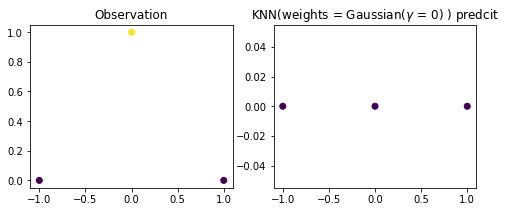

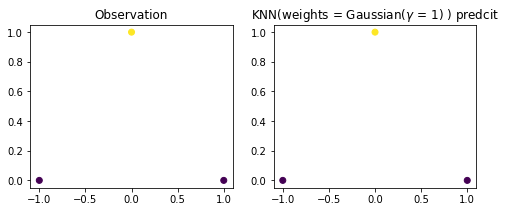

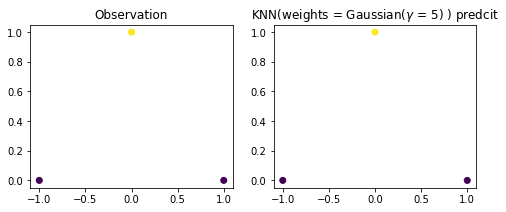

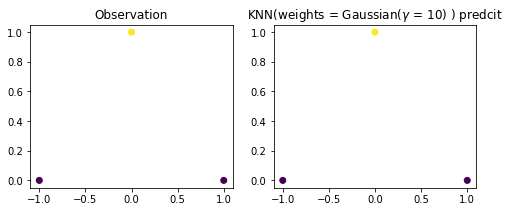

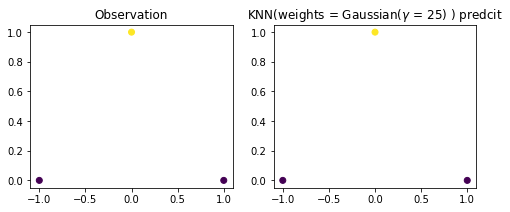

In [3]:
sigmas = [0,1,5,10,25]
for i, weight_fun in enumerate([Gaussian0, Gaussian1, Gaussian5, Gaussian10, Gaussian25]):
    KNN = KNeighborsClassifier(n_neighbors= 3, weights = weight_fun)
    KNN.fit(train_X, train_Y)
    y_predict = KNN.predict(train_X)
    test_X = np.linspace(-0.5,0.5, 100).reshape(-1,1)
    plt.figure(figsize = (8,3))
    plt.subplot(121)
    plt.scatter(train_X, train_Y, c = train_Y)
    plt.title('Observation')
    
    plt.subplot(122)
    plt.scatter(train_X, y_predict, c = y_predict)
    plt.title('KNN(weights = Gaussian($\gamma$ = {}) ) predcit'.format(sigmas[i]))
    plt.savefig('KNN(weights=Gaussian($\gamma$ = {}))predcit.png'.format(sigmas[i]),
                dpi = 500, bbox_inches = 'tight' )
    plt.show()


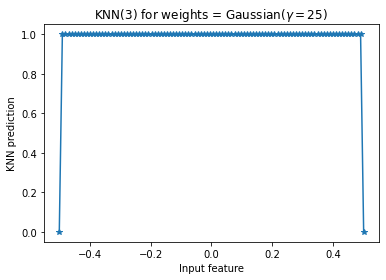

In [4]:
KNN = KNeighborsClassifier(n_neighbors= 3, weights = Gaussian25)
KNN.fit(train_X, train_Y)
y_predict = KNN.predict(train_X)
test_X = np.linspace(-0.5,0.5, 100).reshape(-1,1)
y_pred = KNN.predict(test_X)
y_proba = KNN.predict_proba(test_X)

plt.plot(test_X, y_pred, "*-")
plt.xlabel('Input feature')
plt.ylabel('KNN prediction')
plt.title('KNN(3) for weights = Gaussian($\gamma=25$) ')
plt.savefig('KNN(3) for weights = Gaussian($\gamma=25$).png',dpi = 500, bbox_inches = 'tight' )
plt.show()

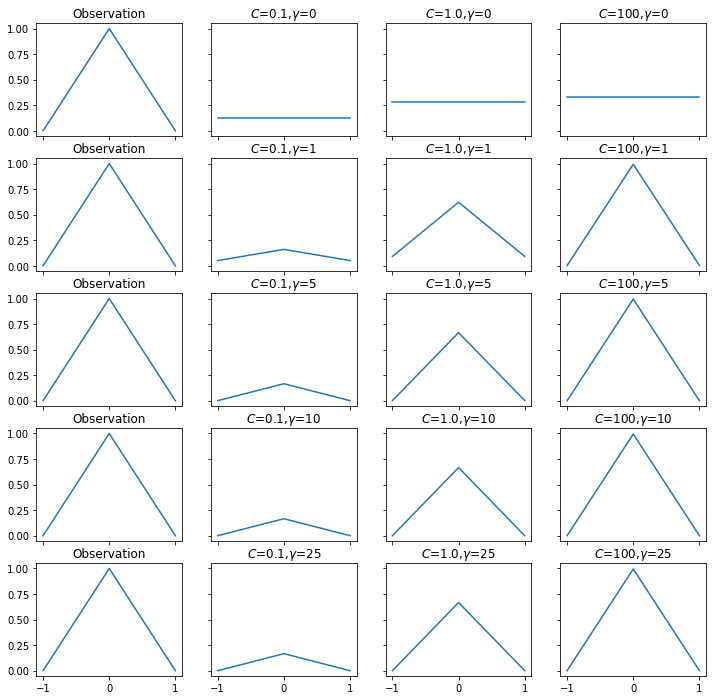

In [5]:
gammas = [0,1,5,10,25]
Cs = [0.1, 1.0, 100]

gamma_records = []
C_records = []
dual_coefs = []

fig = plt.figure(figsize = (12,12))
ax = fig.subplots( 5,4,  sharex='col', sharey='row')
for i,gamma in enumerate(gammas):
    for j in range(4):
        if j == 0:
            ax[i,j].plot(train_X, train_Y)
            ax[i,j].set_title('Observation')
        else:
            C = Cs[j-1]
            alpha = 1 / (2*C)
            kernelRidge = KernelRidge(kernel = 'rbf' ,alpha=alpha, gamma = gamma)
            kernelRidge.fit(train_X,  train_Y)
            y_predict = kernelRidge.predict(train_X)
            dual_coef = kernelRidge.dual_coef_
            gamma_records.append(gamma)
            C_records.append(C)
            dual_coefs.append(dual_coef)
            ax[i,j].plot(train_X, y_predict)
            ax[i,j].set_title('$C$={},$\gamma$={}'.format(C, gamma))
            
plt.savefig('KernelRidge.png',dpi = 500, bbox_inches = 'tight' )
plt.show()

In [6]:
dual_coef_df = pd.DataFrame({ 'gamma': gamma_records, 'C': C_records})
dual_coef_df = pd.concat([dual_coef_df, pd.DataFrame(data = dual_coefs, 
                                                     columns = ['parameter1','parameter2','parameter3'])], 
                         axis = 1)
dual_coef_df.to_csv('dual_coef_resutl.csv', index = None)

In [7]:
df = pd.read_csv('./week5.csv')
df = df.reset_index()
df.columns = ['X','Y']
n = len(df)

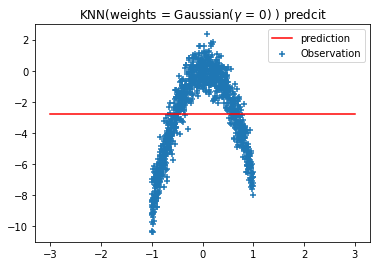

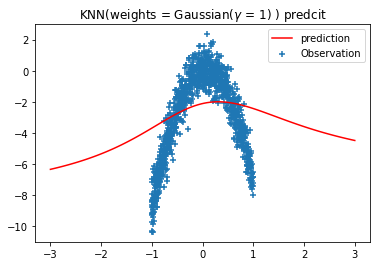

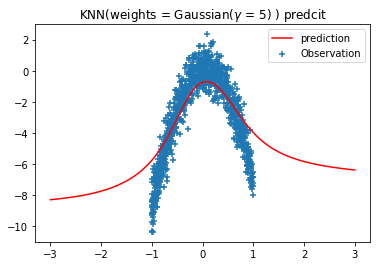

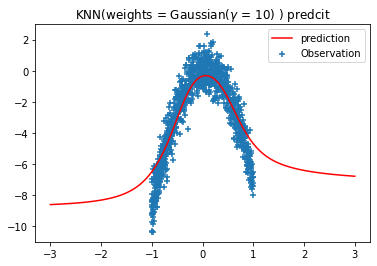

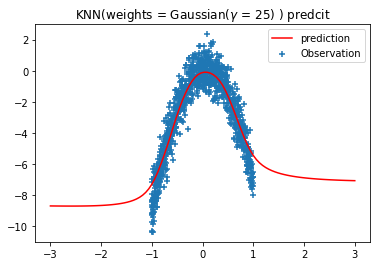

In [8]:
train_X = df['X'].values.reshape(-1,1)
train_Y = df['Y'].values
test_X = np.linspace(-3,3,100).reshape(-1,1)

sigmas = [0,1,5,10,25]
for i, weight_fun in enumerate([Gaussian0, Gaussian1, Gaussian5, Gaussian10, Gaussian25]):
    KNN = KNeighborsRegressor(n_neighbors= n, weights = weight_fun)
    KNN.fit(train_X, train_Y)
    y_predict = KNN.predict(test_X)
    plt.figure()
    plt.scatter(train_X, train_Y, marker='+' , label = 'Observation')
    plt.plot(test_X, y_predict, label = 'prediction', c = 'r')
    plt.legend()
    plt.title('KNN(weights = Gaussian($\gamma$ = {}) ) predcit'.format(sigmas[i]))
    plt.savefig('data_KNN(weights=Gaussian($\gamma$ = {}))predcit.png'.format(sigmas[i]),
                dpi = 500, bbox_inches = 'tight' )
    plt.show()

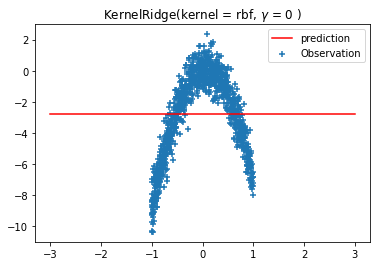

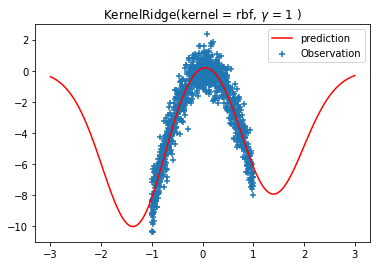

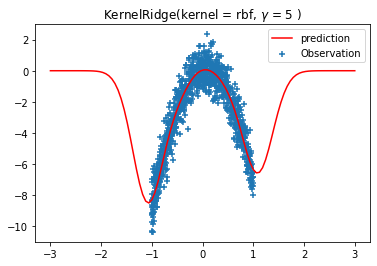

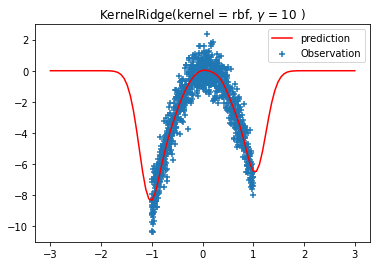

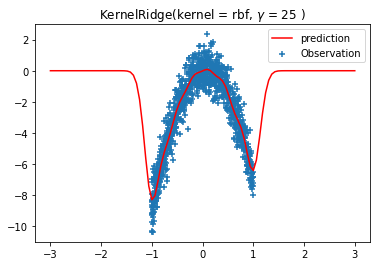

In [9]:
gammas = [0,1,5,10,25]
for i,gamma in enumerate(gammas):
    kernelRidge = KernelRidge(kernel = 'rbf', gamma = gamma)
    kernelRidge.fit(train_X,  train_Y)
    y_predict = kernelRidge.predict(test_X)
    plt.figure()
    plt.scatter(train_X, train_Y, marker='+' , label = 'Observation')
    plt.plot(test_X, y_predict, label = 'prediction', c = 'r')
    plt.legend()
    plt.title('KernelRidge(kernel = rbf, $\gamma$ = {} )'.format(gamma))
    plt.savefig('data_KernelRidge_{}.png'.format(gamma),
                dpi = 500, bbox_inches = 'tight' )
    plt.show()

In [10]:
KNN = KNeighborsRegressor(n_neighbors= int(0.8*n))
param_grid = {'weights': [Gaussian0, Gaussian1, Gaussian5, Gaussian10, Gaussian25]}
KNN_Grid = GridSearchCV(KNN, param_grid , cv = 5)
KNN_Grid.fit(train_X, train_Y)
best_KNN = KNN_Grid.best_estimator_
print("best KNN:",best_KNN)

best KNN: KNeighborsRegressor(n_neighbors=799,
                    weights=<function Gaussian25 at 0x11404e510>)


In [11]:
gammas = [0,1,5,10,25]
Cs = [0.1, 1.0, 100]
alphas = 1 / np.array(Cs) / 2
kernelRidge = KernelRidge(kernel='rbf')
param_grid = {'gamma': gammas, 'alpha' :alphas }
kernelRidge_Grid = GridSearchCV(kernelRidge, param_grid , cv = 5)
kernelRidge_Grid.fit(train_X, train_Y)
best_kernelRidge = kernelRidge_Grid.best_estimator_
print("best kernelRidge:",best_kernelRidge)

best kernelRidge: KernelRidge(alpha=0.005, gamma=1, kernel='rbf')


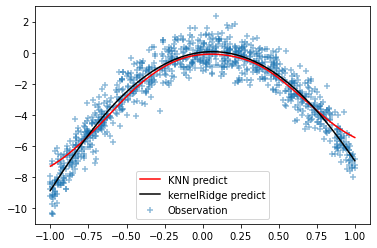

In [12]:
KNN_predict = best_KNN.predict(np.sort(train_X, axis = 0))
kernelRidge_predict = best_kernelRidge.predict(np.sort(train_X, axis = 0))

plt.scatter(train_X, train_Y, marker = '+', label = 'Observation', alpha = 0.5)
plt.plot(np.sort(train_X, axis = 0), KNN_predict, label = 'KNN predict', c = 'r')
plt.plot(np.sort(train_X, axis = 0), kernelRidge_predict, label = 'kernelRidge predict', c = 'black')
plt.legend()

plt.savefig('data_KernelRidge_{}.png'.format(gamma),
            dpi = 500, bbox_inches = 'tight' )
plt.show()

In [13]:
KNN_predict = best_KNN.predict(train_X)
kernelRidge_predict = best_kernelRidge.predict(train_X)
KNN_MSE = mean_squared_error(train_Y, KNN_predict)
kernelRidge_MSE = mean_squared_error(train_Y, kernelRidge_predict)
print('KNN MSE:', KNN_MSE)
print('kernelRidge MSE:', kernelRidge_MSE)

KNN MSE: 0.8104362650710882
kernelRidge MSE: 0.6152594767188772
